# Introduction to GeoPandas. Part 1


Welcome. This is the first part of the Introduction to GeoPandas Workshop. Strangely enough, today we will not talk about [GeoPandas](https://geopandas.org/ "GeoPandas") (gpd) at all. Today, we will be exploring [Pandas](https://pandas.pydata.org/ "Pandas"). As the name suggests, GeoPandas crucially depends on Pandas. Pandas is a Python package offering a  convenient way to handle data.  Therefore, a working knowledge of this package is necessary to use GeoPandas. More in general, Pandas is one of the basis of most data analysis pipelines in Python. Therefore, it is useful to know how it works!

<div class="alert alert-block alert-success">
<b>More Technical:</b> Throughout the notebook. This kind of boxes provide more technical details on what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

As a first step, we need to import Pandas and Numpy. Here I also make sure that the version of Pandas we are using is up to date. Some of the code I wrote may not work otherwise -- and it is, in general, a good idea to have our package updated when we start a new project.

In [4]:
import pandas as pd
# It is very common to use numpy and matplotlib along side pandas
# We honor this tradition here
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
# This line check the pandas version and it makes sure it is at least 1.0.0
version = pd.__version__.split(".")
print(version)
assert int(version[0]) >= 1
assert int(version[2]) >= 2

['1', '0', '4']


### Series

Now, that we have importation out of the way, we start the real exploration of Pandas. As mentioned, Pandas helps you handling data. The way it does this is by providing two classes: **Series** and **DataFrame** (note the capitalization).

**Series** is the simplest of the two fundamental Pandas classes -- we start from there. Practically, a Series is a unidimensional vector. Series are ordered (like a list), their elements are labeled (like dictionaries) and they have a shape (like a numpy ndarray).

<div class="alert alert-block alert-success">
<b>numpy:</b> Pandas Series are very similar to unidimensional numpy ndarray. With respect to ndarray, Series have labels as a further way of referencing them.
</div>


In [ ]:
# Create a Series from a list
v = ["He helps Batman", "Fights crime in Gotham", "Could do whatever, but he helps us"]
ser = pd.Series(v)
# A series object has two basic attributes, "index" and "values".
print(f"This is the value attribute of the Series: {ser.values}")
print(f"This is the index attribute of the Series: {ser.index}")
# Often, we are also interested into the shape of the Series
print(f"This is the shape attribute of the Series: {ser.shape}")
# To get the number of elements in the Series as a integer
print(f"This is the number of elements in Series: {ser.shape[0]}")

The _index_ attribute contains the labels of the Series elements. In this case, we have not specified the _index_ attribute when we created the Series. This means that Pandas goes to its default and just gives to each element an integer number as a name. We can select elements from the Series by label or by position. At this point, name and position coincides, so we will not see much of a difference, but we will see a difference in a heartbit.

<div class="alert alert-block alert-success">
By default Pandas handles the index through an iterator that generates the labels only once we ask it to -- this is memory efficient. This explains the strange output we saw when we printed the index. If we put the iterator in a list comprehension, we will find out that the names are 0, 1, 2.
</div>

Labels and positions can be used to access (select) data from the Series. Here, we see for the first time the .loc[ ], .iloc[ ] [operators](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html, "Selection in Pandas"). Another fundamental selector -- [ ] -- is used below.

In [ ]:
# Select by label, with the .loc operator
print(f"This is the element with label 0: {ser.loc[0]}")
# Select by position, with the .iloc operator ('i' stands for integer)
print(f"This is the element at position 0: {ser.iloc[0]}")

With the default configuration, labels and positions for elements coincide, so the difference is subtle. Let's make the difference more visible. In this block, we will see the [ ] operator for the first time.

In [ ]:
# We can directly use the [] operator to select either by name or by position
print(f"Once again, this is the element with position 0: {ser[0]}")
# Change labels
ser.index = ["Robin", "Batman", "Superman"]
print(f"This is the new index attribute: {ser.index}")
# Check the new index
print(f"This is the element with label 'Robin': {ser.loc['Robin']}")
# Naturally, changing labels did not change in any way the order of the elements
print(f"This is still the element at position 0: {ser.iloc[0]}")
# Let us check if there is any element with name '0' any more. We will do this we an exception
try:
    print(f"This is the element with name 0 in the modified Series: {ser.loc[0]}")
except:
    print("But no element is labeled 0 anymore.")

The [ ] operator can use either labels or positions. For syntactic clarity, I would suggest you stick to .loc[ ] and .iloc[ ] when possible, but (as shown below) this is not always possible.

In [ ]:
print(f"This is the value of the element with label 'Batman': {ser['Batman']}")
print(f"This is the value of the element with position 2: {ser[2]}")

How can we create a Series with a non-default _index_ right from the start?  You can  pass a list of labels as the `index` argument when you create the Series. Alternatively, you can pass a dictionary instead of a list when creating the Series. The keys of the dictionary will become our _index_. As we know, though, dictionary are not ordered. Here, we enforce the order through the [.reindex()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html, "reindex documentation") method, which orders the elements of a Series so that the index of the Series follows the order we input.


<div class="alert alert-block alert-success">
<b>OrderedDict</b>: The OrderedDict class from the standard library package collections provides a way to create a Series with non-default index and fixed order.
</div>

In [ ]:
# Create a Series with non-default index
ser1 = pd.Series(['Terrestrial', 'Terrestrial', 'Kriptonian'], index = ['Robin', 'Batman', 'Superman'])
print(f"This is the index of the new series with the index argument: {ser1.index}")
# Create a Series from a dictionary
ser2 = {'Superman': 'Kriptonian', 'Robin': 'Terrestrial', 'Batman': 'Terrestrial'}
ser2 = pd.Series(ser2)
print(f"This is the index of the new series from a dictionary: {ser2.index}")
# Order the 2nd series as the first using the .reindex() method.
# This makes sure the ser2 present the elements in the same order as ser.
ser2 = ser2.reindex(ser.index)
print(f"This is the index of the new series, re-ordered: {ser2.index}")

#### Selection on Series

Now, let us use some more advanced selection. This is the **core** of Pandas, make sure you have it under your belt. 

We start with selecting more than one element (by position or label) through a list. We check the selection is the same using the Series' method [equals()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.equals.html#pandas.Series.equals, ".equals() Documentation"), which compares each element (index and value) from a Series to the corresponding element (index and value) from the compared Series.

In [ ]:
# Let's select Batman & Robin (notice the order) from the first series both by position and by name
labels    = ['Batman', 'Robin']
positions = [1,0]
# Select by name
batman_robin_by_lab = ser.loc[labels]
# The output of the selection is another Series.
is_series = isinstance(batman_robin_by_lab, pd.Series)
print(f"Is the output a Series? {is_series}")
# Select by position
batman_robin_by_pos  = ser.iloc[positions]
# Since the output of a multiple selection is a Series, we can use Series methods on it.
# Here we use the .equals to check if the selections produced the same output.
same = batman_robin_by_lab.equals(batman_robin_by_pos)
print(f"Are selection by positions and labes the same? {same}")
# We take a look at the selection just to see how it looks like!
print(batman_robin_by_lab)
# Notice, the output Series is ordered differently from the original series.
# Selection is indeed another way of reordering a Series.

# Both selection strategies would work with the [] operator as well.
batman_robin_by_lab = ser[labels]
batman_robin_by_pos = ser[positions]
# We take a look at the new selection
assert batman_robin_by_lab.equals(batman_robin_by_pos)
# Identical results, as before!
print(batman_robin_by_lab)

Selection with lists is useful, but sometimes we want to just select slices -- which is a position-based way of selecting. Slices only work with the [ ] operator. The syntax for slicing is similar to the syntax for slicing built-in lists.

In [ ]:
# First two elements of the series
print(f"Select the first two elements:\n{ser[:2]}")
# Last two elements of the series
print(f"Select the last two elements:\n{ser[-2:]}")
# Everything
print(f"Select all elements:\n{ser[:]}")

So far, we selected based on positions or labels. Pandas offers ways to select based on **values** . This is powerful because it allows the user to filter data with a very simple sintax without ever writing (slow) for-loops. We will see more of this later. For the moment, let us start from the basis. We want to select only Terrestrial super-heros.

<div class="alert alert-block alert-success">
Selection by value is syntactically and practically very close to 'fancy' indexing in numpy and selection on R dataframes and vectors. 
</div>


In [ ]:
# First, notice what happens when we check a series about a condition
terrestrial = (ser2 == 'Terrestrial')
print(f"{terrestrial}\n")
# This is a Series of True/False showing which hero is Terrestrial.
# We can use it exactly like a list to select the right super-hero
terrestrial_heros = ser[terrestrial]
print(f"{terrestrial_heros}\n")
# Put everything together in one line
terrestrial_heros = ser[ser2 == 'Terrestrial']
print(f"{terrestrial_heros}\n")
# the .loc[] operator also works here.
terrestrial_heros = ser.loc[ser2 == 'Terrestrial']
print(f"{terrestrial_heros}\n")

Value selections can be concatenated with logical operators (and, or, not). These operator have a very specific syntax in Pandas. Parenthesis to establish operators' priority are mandatory.

In [ ]:
# We introduce a new Series, hp, which quantifies the hit points of our super-heroes
hp = pd.Series([1, 2, 100000], index = ['Robin', 'Batman', 'Superman'])
# Let's see the operators
# not: we want to select non-terrestrial super heros.
# We could do the same with the != operator, but I want to show you the syntax
non_terr = ser[~(ser2 == 'Terrestrial')]
print(f"{non_terr}\n")
# And: Terrestrial super-heroes with more than 5 hp
hp_hero = ser[(ser2 == 'Terrestrial') & (hp > 5)]
# This is an empty Series
print(f"Empty --> {hp_hero}\n")
#We want someone from planet Heart or someone who has a high resistance
ever_goes = ser[(ser2 == 'Terrestrial') | (hp > 500)]
print(f"{ever_goes}\n")

##### Now you

Complete the code to select (1) every value bigger than 1.96 or smaller than -1.96, (2) the first and last position of the Series (this is more difficult).

In [ ]:
# Don't worry about these lines of code. They simply draw 100 values from a standard normal distribution. 
np.random.seed(42)
norm = np.random.normal(0,1,100)
# Put the normal draws into a Series
norm = pd.Series(norm)
print(norm.values)

# Complete the following two lines

# Select values bigger than 1.96 or smaller than -1.96)
#bigger_smaller = ...

# first and last element
#first_last = ... 

#### Working with Series

So far, we have merely selected elements from Series we already created. It is time for us to do something with our data.

First, we have to clarify something about datatypes. Every Series has one datatype, which is indeed another important attribute of a Series. Datatypes are like blueprints. Given a datatypes, Pandas will know what operations are allowed (or not) with the data. Pandas has specific datatypes that are more specific than Python's built-in datatypes. Let us check the 5 most important datatypes in Pandas.

In [ ]:
# First, let's do integer
numb = [1, 2, 3]
numb = pd.Series(numb)
# Pandas will convert the int built-in int type to a int64 type.
print(f"The dtype of the first Series is {numb.dtype}")
# Continue with boolean
numb = [1,0,0]
# We can specify a dtype when we create a Series
# If we don't, in this case we will get int64 as we just saw
numb = pd.Series(numb, dtype = 'boolean')
print(f'This is how the second Series looks like:\n{numb}')
print(f'Indeed, the dtype of the second Series is {numb.dtype}')
# End with float
numb = [0.1, 2.0, 3.4]
numb = pd.Series(numb)
# Pandas will convert the int built-in float type to a float64 type.
print(f"The dtype of the third Series is {numb.dtype}")
# You may have noticed this before. We have so far worked with the 'object' dtype
print(f"The dtype of the ser variable is {ser.dtype}")

Objects are the dtypes for things Pandas does not know exactly how to handle. They do not have specific operations you can perform on them. Therefore, it is helpful to bring in a more specific dtype when possible. For the longest time, Series containing strings (like the `ser` variable) necessarily had the `object` dtype. Recently, Pandas introduced the `StringDtype` . 

This is a good occasion to check how conversions from one dtype to the other work. Let us convert `ser` to a more convenient dtype. While we are here, I will present you the 32-bit version of the `int64` and `float64` types. If you have smallish integer numbers or floats with less than 7 decimal digits, you will be fine with these types. As the names suggest, they occupy half of the space their 64-bit brothers occupy. We will check this with the [.memory_usage()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.memory_usage.html#pandas.Series.memory_usage, "memory_usage() Documentation") method.

<div class="alert alert-block alert-success">
<b>int32</b>: an int32 can express (with no loss of precision) any integer number between $-2^{31}$ and $2^{31}-1$. The float8/float16/int8/int16 types are also available if needed. In all these types, the integer number (e.g. 8) stands for the number of bits occupied.
</div>

You can find more complete information on dtypes: 
https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes

In [ ]:
# Convert ser to a string dtype
# As we will see, string has its own operations (unlike object)
ser = ser.astype(pd.StringDtype())
print(f"The new dtype for ser is {ser.dtype}")
# Check the memory occupied by numb
print(f"As a {numb.dtype}, numb occupies {numb.memory_usage()} bytes")
# Convert numb to a lighter dtype
numb = numb.astype('float32')
# Check the memory again
print(f"The new dtype for numb is {numb.dtype}")
print(f"After conversion to {numb.dtype}, numb occupies {numb.memory_usage()} bytes")
# No information was lost in this conversion.
print(f"In this case, there is no data-loss when converting to float32:\n{numb}\n")
# What happens if we conver numb to an integer?
numb = numb.astype('int32')
# In this case we did have some information loss.
print(f"There is data-loss when converting to integer:\n{numb}\n")
# But the memory stays the same
print(f"After conversion to {numb.dtype}, numb occupies {numb.memory_usage()} bytes")

This is to really say that what you can do depends crucially on what you have. Square root of a string? Capitalize an integer? Nah. You have to be aware of what data you are dealing with and, sometimes, convert your data to the right type. In the documentation for each dtype you can explore the kinds of operation they allow. The big difference for us is about scalar VS vectorized operations.

In [ ]:
# When we select elements one by one, the allowed operations depends on the kind of data populating the Series
# This is a scalar operation involving just one selected term
batman_robin_st = ser.loc['Batman'] + ser.loc['Robin']
batman_robin_hp = hp.loc['Batman']  + hp.loc['Robin']
print(f'Add string:  {batman_robin_st}')
print(f'Add numbers: {batman_robin_hp}')
# We can still perform (some) elementwise operation operating directly with Series
# These operations are much faster than doing a loop. These are vectorized operations:
# you never loop, but still apply a function to all elements.
hp_sq   = hp**2
ser_len = ser.str.len()
print(f'Square the hp:\n{hp_sq}\n')
print(f'Count the letters in ser:\n{ser_len}\n')
# Vectorized operation can be used to calculate aggregate statistics for the entire Series
hp_md   = hp.median()
hp_mn   = hp.mean()
hp_sm   = hp.sum()
print(f'The median hp is: {hp_md}')
print(f'The mean hp is: {hp_mn}')
print(f'The sum of hp is: {hp_sm}')
# Finally, vectorized operations can add/ subtract/ etc. two (or more) Series elementwise
# In this case elements in the same positions in the two Series will be added/ subtracted/ etc. together
double_ser = ser + ser
print(f'This is the result of adding ser to itself:\n{double_ser}\n')
hp_to_hp = (hp/10000)**hp
print(f'In his good day, Superman is really invincible: {hp_to_hp}')
#Beware of very big numbers or numbers very close to 0.

If we to change a specific value we use a new selector [.at[ ]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.at.html#pandas.Series.at, "at[ ] Documentation"), which only accesses one element at the time. This operator is right choice to change a value inside a Series.

<div class="alert alert-block alert-success">
<b>at[ ]</b>: .at[ ] is faster than .loc[ ]. When setting a value, at[ ] will perform a check on the dtype of the input data and if it is compatible with the dtype of the Series we are modifying. If the data is incompatible, .at[ ] will throw an error. However, when possible .at[ ] silently converts the dtype of the new data you input to match it with the dtype of the Series. This may create confusion when converting from floats to integers -- and possibly other cases. 
</div>

In [ ]:
# Batman just got a new more resistant bat-suit
print(f"Batman had {hp.loc['Batman']} HPs with his old suite.")
hp.at['Batman'] = hp.at['Batman'] + 1
print(f"Now, Batman has {hp.loc['Batman']} HPs. Way to go, Bruce!")

More complex operations on the elements of a Series can be handled through looping or through the all important method [.apply( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html#pandas.Series.apply, ".apply() Documentation"), which applies an input function to every element in the series element-wise. Often, we use .apply( ) with lambda functions or user-defined functions. 

In [ ]:
# Start easy, capitalize descriptions
ser_cap = ser.apply(lambda x: x.upper())
print(f"Capitalized:\n{ser_cap}\n")
# Do some calculation
hp_calc = hp.apply(lambda x: (x**2) - x)
print(f"First calculation:\n{hp_calc}\n")
# It is possible to pass arguments as well. Here we pass the positional arg "n"
hp_calc = hp.apply(lambda x, n: x**2 - n*x, args = [2])
print(f"Second calculation:\n{hp_calc}\n")

Let's wrap up this part about Series with a more complex example. In this case, we need to apply a different function to each element of the series. Looping is the simplest solution to this issue, but is slower than vectorized operations. Here, we use the method [.iteritems( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iteritems.html#pandas.Series.iteritems, "iteritems Documentation"), which outputs a tuple with the label of the element we are currently iterating through (0 position) and its value (1 position). However, I will also show how to solve the problem using (once again) .apply( ). In these cases, .apply( ) tend to be quicker, but it is less memory-efficient. 

In [ ]:
# Yeah, Superman is all good, but we know he has a weak point: Kriptonite
# Lex Luthor decided it is time to inject kriptonite in tap water, but Lex has a scarse supply of Kriptonite.
# We model the amount of kriptonite Lex manage to injects in one day as a random number from 0 to 1.
# Draw a uniform random numb from 0 to 1.
np.random.seed(42)
kripto_water = np.random.random()
# Round it to the fifth decimal figure
kripto_water = np.round_(kripto_water, 5)
print(f'Today there is {kripto_water} Kriptonite in the water.')

# All super-heroes drink tap water. But the effect of Kriptonite is different depending on where they come from.
# We write two functions taking the hp number as input and calculating the hp as effected by kriptonite.
# For Superman, below a certain threshold, no effects. Above, the effect are devastating.
def kriptonite_effect_superman(x, prop_kript, threshold = 0.7):
    if prop_kript >= threshold:
        return(x * 0.00001)
    else:
        return(x)
# For Terrestrials, below a certain treshold, the effects are mildly bad. Above, the effects are beneficial.
def kriptonite_effect_terrestrial(x, prop_kript, threshold = 0.4):
    if prop_kript >= threshold:
        return(x * 1.25)
    else:
        return(x * 0.8)
# Bad news. We were too optimistic about Superman threshold.
# After we wrote the function, we discovered his threshold is actually 0.3
# We will need to use this value instead of the default value (=0.7)


# Now we want to apply one function to Superman and one function to Batman & Robin
# We can easily do this with looping 
# this can be even done in one line with a list comprehension, but let us be more explicit
kripto_hp = []
for hero, hp_hero in hp.iteritems():
    # We check if the current hero is terrestrial
    if ser2[hero] == 'Terrestrial':
        kripto_hp.append(kriptonite_effect_terrestrial(hp_hero, kripto_water))
    else:
        kripto_hp.append(kriptonite_effect_superman(hp_hero, kripto_water, threshold=0.3))
kripto_hp = pd.Series(kripto_hp, index = ['Robin', 'Batman', 'Superman'])
print(f'The effects of Lex\'s diabolical plans:\n {kripto_hp}\n')
        
# We can do this calculation with an .apply() as well. 
# However, when we use .apply(), the function applied and its argument are the same for all elements in a Series.
# In our case we would really like to apply different fuctions to Superman and Terrestrials.
# Therefore, we cannot use a single .apply() to do the job...we need a to use .apply() twice
# Apply the function for terrestrial. We pass the kripto_water var as a positional argument 
kripto_t_hp = hp.apply(kriptonite_effect_terrestrial, args = [kripto_water])
# Apply the function for Superman. We also modify his treshold with a keyword argument
kripto_s_hp = hp.apply(kriptonite_effect_superman, args = [kripto_water], threshold = 0.3)
# terr contains whether a super-hero is terrestrial. It is a boolean Series.
terr = (ser2 == "Terrestrial")
# Let's analyze the next line. 
# we use terr in multiplications since False = 0 and True = 1 when we do arithmetic operation with them.
kripto_hp  = (terr * kripto_t_hp) +( ~(terr) * kripto_s_hp)
# Overall, we get the same result
print(f'Once again, the effects of Lex\'s diabolical plans:\n {kripto_hp}\n')
# No loop (= faster), but extra calculation, lines and memory.

##### Your Turn

Start from a list containing numbers in string formats (this happens if you read numbers from a file or scrape them from the web). Calculate the median of the values. Use the np.round() function to get the closest integer. (More difficult) If the closest integer is even, square the number. If the closest integer is odd, multiply the number by 2.

Example of np.round: np.round(2.3) will output 2.0

In [ ]:
# Initial list
numb = ['1.2', '1.1', '0.2', '2.8', '7.1', '5.5', '6.7']
# Put them into a Series
numb = pd.Series(numb)
print(isinstance(numb, pd.Series))

# Change their dtype to float32
numb = numb.astype('float32')
print(numb.dtype)
# Calculate the median
# med = ...

# Use .apply() and np.round() to round number.
rounded_numb = numb.apply(lambda x: np.round(x))
print(rounded_numb)

# Give your best try. square numbers that are close to an even
# multiply by 2 those numbers that are close to an odd.
# Suggestion to check if a number (x) is odd or even: x%2 == 0
rounded_numb = rounded_numb.astype('int32')
is_even = rounded_numb.apply(lambda x: x%2 == 0)
numb_sq = numb**2
numb_db = numb*2
numb_new = (is_even * numb_sq) + (~is_even * numb_db)
print(numb_new)


### DataFrame

You may have noticed that we have three inter-related variables (ser, ser2 and hp). All of these variables are Series with the same index. The logical next step is to put the three series in a one table, where each row represents a hero and each column represents a characteristic of the hero (such as hp). This is the intution behind the **DataFrame** object. A DataFrame is the way Pandas represents tabular data. Every row represents an entity. Every column represents a characteristic. Beware, DataFrames are still made of Series: as the code below shows, every column is a Series. As shown below, we can also interpret evey row as a Series. Therefore, what we learned about Series will be very relevant.

The major difference between a Series and a DataFrame regards the number of dimensions of the two objects. Whereas a Series is a unidimensional vector, a DataFrame is a bi-dimensional table -- a.k.a. a matrix or a spreadsheet, if you prefer these terms. Like Series, a DataFrame is ordered (in both dimensions), its elements are labeled (in both dimension) and it has a shape. What I mean by "in both dimensions" is that we have an order among rows as well an order among columns. Similarly, both the rows and the columns have labels. 

Like Series, a DataFrame has an _index_ , a _shape_ , some _values_ , assigned _dtypes_ . Moreover it also presents a _columns_ attribute containing the names of the columns.

We use the DataFrame's method [.head( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head, ".head( ) Documentation"), which prints for us the first 5 rows of our data -- in this case, it will only print 3 rows since our data is that small.

In [ ]:
# Create a DataFrame from the Series we have above
super_df = pd.DataFrame({'Description': ser, 'Origin': ser2, 'HP':hp})
super_df.head()
# Back to some old friends
print(f'This is the index attribute of the dataframe: {super_df.index}\n')
print(f'This is the shape attribute of the dataframe: {super_df.shape}\n')
# The values of a df is a 2-dimensional numpy.ndarray
print(f'This is the values attribute of the dataframe:\n{super_df.values}\n')
# Notice the s!
print(f'This is the dtypes attribute of the dataframe:\n{super_df.dtypes}\n')
# This is new. It is like an index, but for columns
print(f'This is the columns attribute of the dataframe:\n{super_df.columns}\n')

#### Exploratory Data Analysis with DataFrame

You may have guessed that most of the time we will not be inputing the data by hand. Pandas can read tabular data (.csv, .tsv, Excel) that you have stored in the hard drive (or on a server). For the rest of the workshop, we will use the [super hero dataset](https://www.kaggle.com/claudiodavi/superhero-set), originally published on Kaggle by Claudio Davi. It is in the same repository as this notebook and you should have downloaded it alongside this file. We use the command [read_csv( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html, 'read_csv( ) Documentation') to read the dataset as a DataFrame in our environment.
 
<div class="alert alert-block alert-success"><b>read_csv( )</b>: read_csv( ) is one of the most complex command in Pandas for the amount of different file formats it handles (on every OS!) as well as the great amount of options that it offers. Among all options, I would like to signal the dialect option to control non-standard format for tabular data (like tab-separated values). Another important set of options are the nrows, usecols and chunksize that allow users to deal with data that cannot fit in the RAM.
</div>

In [13]:
url = r'https://raw.githubusercontent.com/non87/GeoPandas-Workshop/master/data/heroes_information.csv'
super_df = pd.read_csv(url)

Now, everytime I load a dataset for the first time, I do a routine check of what I am seeing. I use the .head( ) method seen above, then the [.info( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info, ".info( ) Documentation") method. As the name suggests, .info( ) gives you a lot of important information about the DataFrame: the `dtype` of each column (remember, every column is a Series), the memory occupied by the DataFrame, the _index_ of the DataFrame and the number of NaNs -- but more on NaNs in a minute.

Another important exploratory step is to print summary statistics for each variable. We will use the [.describe( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html, ".describe( ) Documentation") method to output summary statistics of each column.

In [14]:
print(f'Head: {super_df.head()}')
print("###")
print(f'{super_df.info()}')
print("###")
# Notice the include=all. Otherwise, you will get only the description of numerical column
print(super_df.describe(include='all'))

Head:    Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0  
###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      ----

Notice that we have the same problem as above, we have many `object` dtypes where we really would like `string`. This is a quick trick to convert all `object` columns using the method [.convert_dtypes( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.convert_dtypes.html?highlight=convert_dtypes#pandas.DataFrame.convert_dtypes, ".convert_dtypes( ) Documentation"). Another possibility would be to use the `category` dtype, but let us stick to `string`.

<div class="alert alert-block alert-success">By default, .convert_dtypes( ) will also convert integers and booleans to corresponding types supporting the new pd.NA null value. As long as you will not run into a NaN these conversion should be hardly noticeable. However, we avoid it here because it creates problems with the plotting below.
</div>

In [15]:
super_df = super_df.convert_dtypes(convert_integer = False)
print(f"With new dtypes:\n{super_df.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    string 
 2   Gender      734 non-null    string 
 3   Eye color   734 non-null    string 
 4   Race        734 non-null    string 
 5   Hair color  734 non-null    string 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    string 
 8   Skin color  734 non-null    string 
 9   Alignment   734 non-null    string 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), string(8)
memory usage: 63.2 KB
With new dtypes:
None



You may have noticed that the info command told us there are 0 NaNs. Great! But wait, what does it mean that Abraxas weights -99 Kgs? My understanding is that -99 is the way that the data collector coded NaNs. The .info( ) commands only recognizes as NaN those values that are "ufficially" coded as NaNs by Pandas. You create those with specific commands we will see in a bit. The .describe( ) method indeed shows that we have -99 as minimum values in the `Height` and `Weight` columns.

<div class="alert alert-block alert-success"><b>Missing data( )</b>: The way missing data is coded internal to Pandas is a little bit of jungle. Few different types of NaN exist depending on the dtype and the situation is evolving. You can check the following link for a complete and updated overview: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data-na </div>

Before proceeding, I need to spell out a difference in the way the [ ] selector works on a DataFrame with respect to Series. With a DataFrame, this selector is only used to retrieve entire columns.

In [16]:
# Example
print(f"This is the name column: {super_df['name']}")

This is the name column: 0               A-Bomb
1           Abe Sapien
2             Abin Sur
3          Abomination
4              Abraxas
            ...       
729    Yellowjacket II
730               Ymir
731               Yoda
732            Zatanna
733               Zoom
Name: name, Length: 734, dtype: string


A quick, alternative way to check the state of our data is plotting. We will plot the weight and height variables. Pandas has convenient commands that make quick plotting very easy. These are rough plots for exploratory analysis. For "publication-level" plots, we will always use matplotlib, which is what Pandas uses internally anyway. This is outside the scope of the workshop, but Pandas dialogues with matplotlib very well. For more info on plotting in Pandas, follow this [link](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html#04_plotting, "Plotting in Pandas").

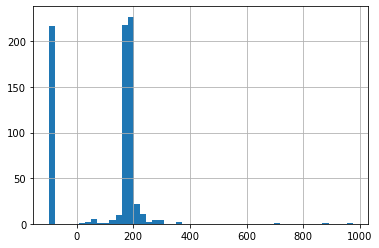

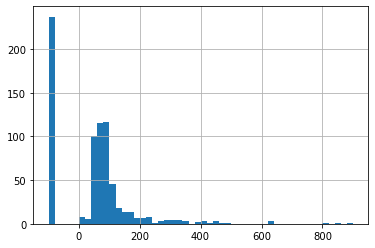

<Figure size 432x288 with 0 Axes>

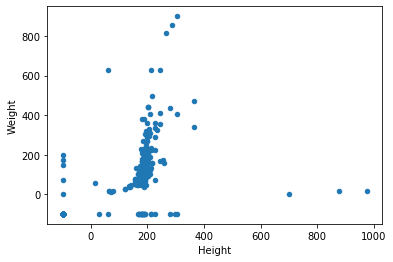

In [17]:
super_df['Height'].hist(bins=50)
# Just to reset matplotlib figure.
# If you don't do this, the 2 histograms will end up in the same picture
plt.figure()
super_df['Weight'].hist(bins=50)
# It appears there is a number of heros with -99 height and weight.
# But, are those the same heros?
plt.figure()
super_df.plot.scatter(x='Height', y='Weight')
# Just FYI you can't as easily plot categorical data

It looks like we want to substitute some values (-99) with NAs. Let's do this by putting these values equal to `None`, which Pandas recognize as a code for NaN -- other codes are available. 

This is a typical case where selection helps (there are other workarounds, but selection is the way we will do it). Lucky enough, we know how to select from our work with Series. So, selection in DataFrame will be way quicker. As for Series, a selection can be based on position, label or values. We will use our friends .iloc[ ] and .loc[ ] for selections on positions and labels, respectively. The key difference between Series and DataFrame when selecting is that in a DataFrame you have to select *2* dimensions. You have a selection for the row and a seletion for the column. When you select on both rows and columns by label/position, you must use the same kind of selection (label or position) for both dimensions. Selection by value is more flexible. It is done with .loc[ ] and it typically mixes a value selection for row and a label-selection for columns (see examples below).

In [18]:
# We already saw that the .[] operator selects entire columns.
# This is an example of .iloc[ ] on rows: select first five rows 
# notice the , to separate the selection on rows from the selection on columns
print(f'This is the same as .head( ):\n{super_df.iloc[:5, :]}\n')
# Select second and fifth columns
print(f'These are the second and fifth columns:\n{super_df.iloc[:,[1,4]]}')
# Select same column, but through their labels
print(f"These are really the same columns:\n{super_df.loc[:, ['name', 'Race']]}")
# This is a selection of rows and columns by index. Notice that index is the default integer list...
print(f"Some random heroes:\n{super_df.loc[[231,422, 455], ['name', 'Race']]}")
# Selection of rows and columns by value: we use the .loc[ ] operator
# Under the hood, the .loc[ ] operator accepts Boolean Series as selector
# It is the same mechanism we saw for selecting Series based on values
print(f"Say -99:\n {super_df.loc[super_df['Height'] == -99, ['name', 'Height', 'Weight']]}")
# We can select both rows and columns with a Boolean array. Here we select height and weight
# In my experience, this is not so common
col_select = np.full((super_df.shape[1], ), False)
col_select[[6,10]] = True
print(f"Selecting Heights and Weights with a Boolean Series:\n{super_df.loc[:, col_select]}")
# Now it is easy!
# Substitute all -99 with None
super_df.loc[super_df['Height'] == -99, 'Height'] = None
super_df.loc[super_df['Weight'] == -99, 'Weight'] = None
# Indeed, This is now empty
print(f"Say -99 no more!\n {super_df.loc[super_df['Height'] == -99, ['name', 'Height']]}")

This is the same as .head( ):
   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0  

These are the second and fifth columns:
                name               Race
0             A-Bomb              Human
1         Abe Sapien      

You may have noticed that the columns 'Race' and 'Hair-color' contain a lot of "-". Even the columns 'Gender', 'Eye color', and 'Alignment' contains some "-". Let's set all those "-" to NaN as well.  When it comes to the `string` dtype, we need to use a slightly different command to create NaNs. This is another novelty of Pandas 1.0.

In [19]:
# Create NaNs in the 'Gender' column
super_df.loc[super_df['Gender'] == '-', 'Gender'] = pd.NA

##### Your Turn

Set the rest of the "-" to NaNs. To make sure we don't mess up the data (it happens!), we will do the exercise on a copy of the DataFrame first. We will use the method [.copy( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html?highlight=copy#pandas.DataFrame.copy, '.copy( ) Documentation') to create such a copy.

<div class="alert alert-block alert-success"><b>SerenDEEPity</b>: By default, .copy( ) will create a shallow copy of a DataFrame. This is sufficient 99% of the time. You can set the keyword argument 'deep=True' when calling the method to obtain a deep copy. As the documentation explains, this is still not as deep as the deepcopy created by the deepcopy function from the copy package. You can use this function if you want to be extrasafe about not modifying the copied object.</div>

In [20]:
# Mistakes happen. We will use a copy of the DataFrame for this exercise
playground = super_df.copy()
# Really the same
print(playground.head())
# For each column in the list cols, change '-' to Nan in the playground df
cols = ['Eye color', 'Race', 'Hair color', 'Skin color', 'Alignment']





   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4     NaN      Marvel Comics          -       bad     NaN  


You may wonder whether it is possible to do this with a loop...

In [21]:
for col in cols:
    super_df.loc[super_df[col] == '-', col] = pd.NA
print(super_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    string 
 2   Gender      705 non-null    string 
 3   Eye color   562 non-null    string 
 4   Race        430 non-null    string 
 5   Hair color  562 non-null    string 
 6   Height      517 non-null    float64
 7   Publisher   719 non-null    string 
 8   Skin color  72 non-null     string 
 9   Alignment   727 non-null    string 
 10  Weight      495 non-null    float64
dtypes: float64(2), int64(1), string(8)
memory usage: 63.2 KB
None


Especially for 'Skin color' we have only 10% of non NaN. This may be a little too much. If you check heroes like Superman, Batman or Black Panther you will soon realize that "Skin color" only registers exotic skin colors (like blue or green), but no human colors. We should remedy this.

In [22]:
# Let's remedy the excessive amount of NaNs
super_df.loc[super_df['Race']=='Human', 'Skin color'] ='human-like'
print(f"{super_df.head()}\n" )

   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher  Skin color Alignment  Weight  
0   203.0      Marvel Comics  human-like      good   441.0  
1   191.0  Dark Horse Comics        blue      good    65.0  
2   185.0          DC Comics         red      good    90.0  
3   203.0      Marvel Comics        <NA>       bad   441.0  
4     NaN      Marvel Comics        <NA>       bad     NaN  



#### Working with DataFrames

To wrap this up, we will answer the question that keep most of us awake at night: How does the Body Mass Index (BMI) of Marvel heroes compare to the BMI of DC heroes? In answering this all important question, we will check how to modify/ create data for and from a DataFrame.

Let's start with creating our own index for the data. You may have notice a column named "Unnamed: 0". This was the original index column in the data. We can signal this to Pandas when loading the data -- but we did not know before opening the data! Anyway, we will create an index from the information in each row using the [.iterrows()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html?highlight=iterrows#pandas.DataFrame.iterrows, ".iterrows( ) Documentation") method. It is substantially similar to the .iteritems() method from Series, in that it outputs a tuple where the first element is the index of the row and the second element is the content of the row...in the form of a Series!

To change index we will use the method [.set_index( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html#pandas.DataFrame.set_index, '.set_index( ) Documentation'). This is probably a good time to mention that Pandas has a specific kind of object to represent an Index for a Series or a DataFrame. This kind of object is called [Index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html?highlight=index#pandas.Index, "Index documentation"). It is substantially an unmutable numpy ndarray. This is really nothing to be concerned about too much, but we need to be aware of this when setting a new index for the DataFrame -- see the code.

We will create a index in the form "publisher_integer", where integer is a running count of how many heroes any publisher produced. There are many ways to do this. In the space of a single loop we can use a [Counter](https://docs.python.org/3.6/library/collections.html#collections.Counter, "Counter Documentation") dictionary from collections. Also, Counters are great, so it is good to know they exist.

Finally, we will drop the not-so-interesting "Unnamed: 0" column with the method [.drop( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop, ".drop( ) Documentation"), which, as the name suggests, is used to drop columns or rows.

In [23]:
from collections import Counter

# Just to show you how .iterrows() works, I will print out the first element out of the loop.
iterrows_check = super_df.iterrows()
ind, row = next(iterrows_check)
print(f"This is the first element in the tuple, that is the index: {ind}\n")
print(f"This is the second element in the tuple, that is the row as a Series:\n{row}\n\n")

This is the first element in the tuple, that is the index: 0

This is the second element in the tuple, that is the row as a Series:
Unnamed: 0                0
name                 A-Bomb
Gender                 Male
Eye color            yellow
Race                  Human
Hair color          No Hair
Height                  203
Publisher     Marvel Comics
Skin color       human-like
Alignment              good
Weight                  441
Name: 0, dtype: object




In [26]:
# We will now use iterrows to create an index column.
# List that will contain the new indices
ind_column = []
# Dictionary Counter for the publishers
pub_count  = Counter()
for ind, row in super_df.iterrows():
    # we need to check for NA in the publisher part
    if row.loc['Publisher'] is pd.NA:
        # Notice that we are not really changing the value in the DataFrame, but only in row.
        row.loc['Publisher'] = 'unknown'
    # Since row is a Series, we use what we know about Series to select data 
    # We delete white spaces from the publisher name using the .replace() method of strings
    pub_name = row.loc['Publisher'].replace(" ", "")
    # We ask how many heroes from the same publisher we already saw to our Counter
    # Notice that a Counter will always output 0 when asked about a key it does not already have
    pub_n = pub_count[row.loc['Publisher']]
    # We construct the new index from the publisher name and the publisher n
    new_ind = pub_name  + '_' + str(pub_n)
    # Append the index
    ind_column.append(new_ind)
    # Update the counter
    pub_count[row.loc['Publisher']] += 1

# Now change index.
# We have to conver the list to a Index object.
super_df = super_df.set_index(pd.Index(ind_column))
# Drop the 'Unnamed: 0' columns
#super_df = super_df.drop(labels = ['Unnamed: 0'], axis = 1)
# Looks better
print(f"New index:\n{super_df.head()}")

New index:
                          name Gender Eye color               Race Hair color  \
MarvelComics_0          A-Bomb   Male    yellow              Human    No Hair   
DarkHorseComics_0   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
DCComics_0            Abin Sur   Male      blue            Ungaran    No Hair   
MarvelComics_1     Abomination   Male     green  Human / Radiation    No Hair   
MarvelComics_2         Abraxas   Male      blue      Cosmic Entity      Black   

                   Height          Publisher  Skin color Alignment  Weight  
MarvelComics_0      203.0      Marvel Comics  human-like      good   441.0  
DarkHorseComics_0   191.0  Dark Horse Comics        blue      good    65.0  
DCComics_0          185.0          DC Comics         red      good    90.0  
MarvelComics_1      203.0      Marvel Comics        <NA>       bad   441.0  
MarvelComics_2        NaN      Marvel Comics        <NA>       bad     NaN  


Now that our df looks better, let's focus on the real question. Is there difference in the BMI of heroes from Marvel and from DC?

In [29]:
# Calculate the BMI of the heroes
super_df['BMI'] = super_df['Weight']/((super_df['Height']/100)**2)
# No questions, heroes have a lot of different bodies.
print(super_df.loc[super_df['BMI'].notna()].head())
# But now back to the real question
# We will evaluate this using the median. Other choices could be reasonable.
# Notice that the median automatically ignores NaNs
marvel_med = super_df.loc[super_df['Publisher'] == 'Marvel Comics', 'BMI'].median()
DC_med = super_df.loc[super_df['Publisher'] == 'DC Comics', 'BMI'].median()
print(f"This is the median for Marvel: {marvel_med}")
print(f"This is the median for DC: {DC_med}")
print(f"And this is their difference: {marvel_med - DC_med}")


                            name Gender Eye color               Race  \
MarvelComics_0            A-Bomb   Male    yellow              Human   
DarkHorseComics_0     Abe Sapien   Male      blue      Icthyo Sapien   
DCComics_0              Abin Sur   Male      blue            Ungaran   
MarvelComics_1       Abomination   Male     green  Human / Radiation   
MarvelComics_3     Absorbing Man   Male      blue              Human   

                  Hair color  Height          Publisher  Skin color Alignment  \
MarvelComics_0       No Hair   203.0      Marvel Comics  human-like      good   
DarkHorseComics_0    No Hair   191.0  Dark Horse Comics        blue      good   
DCComics_0           No Hair   185.0          DC Comics         red      good   
MarvelComics_1       No Hair   203.0      Marvel Comics        <NA>       bad   
MarvelComics_3       No Hair   193.0      Marvel Comics  human-like       bad   

                   Weight         BMI  
MarvelComics_0      441.0  107.015458  


#### Now You, but for Real

This workshop introduced the foundation of Pandas: Series, DataFrames, Dtypes, vectorized operations and selection. There is a lot more ground to cover, but the foundations you learned here will *always* come up in your use of Pandas.  Real life coding is a body-to-body with documentation: very few coders can do without looking at online documentation frequently. This workshop has put you in a place where you can use Pandas documentation and make sense of what is going on (most of the time).

So, let's simulate real coding in this controlled environment. In the next exercise you will probably need to use methods and functions that were not introduced in this workshop. Use Google and the remarkably-complete official [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html). 

In [ ]:
# These are sort of open-ended questions, meaning that I did not provide you a straightforward way to do them
# 1. Find out which heros have the maximum and minimum BMI overall
# The range of a variable is the maximum value minus the minimum value.
# 2. Find out which publisher has the widest range. 
# Try use the method .groupby( ) for the following. But other solutions are available if you prefer.
# 3. Check the minimum BMI for all publishers.
# 4. Check the maximum BMI for all publishers.
# 5. Check the mean BMI for all publishers excluding those that only have 1 hero.